In [2]:
!pip install keras

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)


A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 731c5ac602752760c8e48fbffcf8c3b850d9dc2a2aedcf2cc48468fc17b673d1 so we will re-download the data.
11501568/11490434 [==============================] - 72s 6us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [3]:
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255                   
X_test /= 255
print("X Training matrix shape", X_train.shape)
print("X Testing matrix shape", X_test.shape)


X Training matrix shape (60000, 784)
X Testing matrix shape (10000, 784)


In [4]:
nb_classes = 10
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)
print("Y Training matrix shape", Y_train.shape)
print("Y Testing matrix shape", Y_test.shape)


Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)


In [5]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
# model.add(Activation('relu'))
# model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# history = model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=128, epochs=10, verbose=1)


Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.2668 - accuracy: 0.9232 - val_loss: 0.1367 - val_accuracy: 0.9595
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1078 - accuracy: 0.9695 - val_loss: 0.0968 - val_accuracy: 0.9712
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0715 - accuracy: 0.9796 - val_loss: 0.0738 - val_accuracy: 0.9771
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0514 - accuracy: 0.9849 - val_loss: 0.0680 - val_accuracy: 0.9787
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0379 - accuracy: 0.9890 - val_loss: 0.0640 - val_accuracy: 0.9789
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0284 - accuracy: 0.9919 - val_loss: 0.0624 - val_accuracy: 0.9791
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0210 - accuracy: 0.9942 - val_loss: 0.0633 - val_accuracy: 0.9804
Epoch 

In [7]:
score = model.evaluate(X_test, Y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])


313/313 [==============================] - 1s 4ms/step - loss: 0.0647 - accuracy: 0.9806
Test Loss: 0.0647052526473999
Test accuracy: 0.9805999994277954


In [8]:
#predicted_classes = model.predict_classes(X_test)
predicted_classes = np.argmax(model.predict(X_test), axis=-1)
 
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]


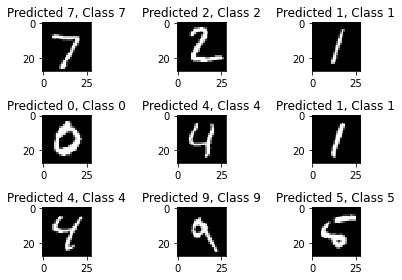

In [9]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
#     plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
